<style>div.container { width: 100% }</style>
<img style="float:left;  vertical-align:text-bottom;" height="65" width="172" src="../assets/holoviz-logo-unstacked.svg" />
<div style="float:right; vertical-align:text-bottom;"><h2>Tutorial 4. Basic Plotting</h2></div>

Previous sections have focused on putting various simple types of data together in notebooks and deployed servers, but most people will want to include plots as well. In this section, we'll focus on one of the simplest (but still powerful) ways to get a plot.

If you have tried to visualize a `pandas.DataFrame` before, then you have likely encountered the [Pandas .plot() API](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). This basic plotting interface uses [Matplotlib](http://matplotlib.org) to render static PNGs or SVGs in a Jupyter notebook using the`inline` backend (or interactive figures via `%matplotlib notebook` or `%matplotlib widget`) and for exporting from Python, with a command that can be as simple as `df.plot()` for a DataFrame with one or two columns. 

The Pandas .plot() API has emerged as a de-facto standard for high-level plotting APIs in Python, and is now supported by many different libraries that use other underlying plotting engines to provide additional power and flexibility. Thus learning this API allows you to access capabilities provided by a wide variety of underlying tools, with relatively little additional effort. The libraries currently supporting this API include:

- [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) -- Matplotlib-based API included with Pandas. Static or interactive output in Jupyter notebooks.
- [xarray](https://xarray.pydata.org/en/stable/plotting.html) -- Matplotlib-based API included with xarray, based on pandas .plot API. Static or interactive output in Jupyter notebooks.
- [hvPlot](https://hvplot.pyviz.org) -- HoloViews and Bokeh-based interactive plots for Pandas, GeoPandas, xarray, Dask, Intake, and Streamz data.
- [Pandas Bokeh](https://github.com/PatrikHlobil/Pandas-Bokeh) -- Bokeh-based interactive plots, for Pandas, GeoPandas, and PySpark data.
- [Cufflinks](https://github.com/santosjorge/cufflinks) -- Plotly-based interactive plots for Pandas data.
- [Plotly Express](https://plotly.com/python/pandas-backend) -- Plotly-Express-based interactive plots for Pandas data; only partial support for the .plot API keywords
- [PdVega](https://altair-viz.github.io/pdvega) -- Vega-lite-based, JSON-encoded interactive plots for Pandas data.

In this notebook we'll explore what is possible with the default `.plot` API and demonstrate the additional capabilities of `.hvplot`, using the same tabular dataset of earthquakes and other seismological events queried 
from the [USGS Earthquake Catalog](https://earthquake.usgs.gov/earthquakes/search) using its 
[API](https://github.com/pyviz/holoviz/wiki/Creating-the-USGS-Earthquake-dataset) as in previous sections. Of course, this particular dataset is just an example; the same approach can be used with just about any tabular dataset.

### Read in the data

Here we'll read in the data using Dask, which works well with a relatively large dataset like this (2.1 million rows). We'll use `.persist()` to bring the whole dataset into main memory (which should be feasible on any recent machine) for higher performance:

In [1]:
import dask.dataframe as dd

In [2]:
df = dd.read_parquet('../../../../holoviz-examples/data/earthquakes.parq').persist()
df.time = df.time.astype('datetime64[ns]')
df.head()

C:\Users\CRTUCKER\Anaconda3\envs\holoviz\lib\site-packages\fastparquet\dataframe.py:5: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import CategoricalIndex, RangeIndex, Index, MultiIndex


depth  depthError     dmin     gap  horizontalError          id  \
index                                                                     
0       7.800       1.400  0.09500  245.14              NaN  nn00001936   
1       4.516       0.479  0.05131   52.50              NaN   ci9137218   
2      33.000         NaN      NaN     NaN              NaN  usp0009mwt   
3      33.000         NaN      NaN     NaN              NaN  usp0009mws   
4       7.200       0.900  0.11100  202.61              NaN  nn00001935   

       latitude locationSource  longitude   mag  ...  magSource  magType net  \
index                                            ...                           
0       37.1623             nn  -116.6037  0.60  ...         nn       ml  nn   
1       34.3610             ci  -116.1440  1.72  ...         ci       mc  ci   
2       10.6930            trn   -61.1620  2.10  ...        trn       md  us   
3       -1.2030             us   -80.7160  4.50  ...         us       mb  us   
4       38.7860             nn  -119.6409  1.40  ...         nn       ml  nn   

       nst                                     place     rms    status  \
index                                                                    
0      5.0                                    Nevada  0.0519  reviewed   
1      0.0  26km NNW of Twentynine Palms, California  0.1300  reviewed   
2      NaN             Trinidad, Trinidad and Tobago     NaN  reviewed   
3      NaN                 near the coast of Ecuador  0.6000  reviewed   
4      5.0                                    Nevada  0.0715  reviewed   

                         time        type                   updated  
index                                                                
0     2000-01-31 23:52:00.619  earthquake  2018-04-24T22:22:44.135Z  
1     2000-01-31 23:44:54.060  earthquake  2016-02-17T11:53:52.643Z  
2     2000-01-31 23:28:38.420  earthquake  2014-11-07T01:09:23.016Z  
3     2000-01-31 23:05:22.010  earthquake  2014-11-07T01:09:23.014Z  
4     2000-01-31 22:56:50.996  earthquake  2018-04-24T22:22:44.054Z  

[5 rows x 22 columns]

### Using Pandas `.plot`

The first thing that we'd like to do with this data is visualize the locations of every earthquake. So we would like to make a scatter or points plot where `x='longitude'` and `y='latitude'`. 

If you are familiar with the `pandas.plot` API, you might expect to execute `df.plot.scatter(x='longitude', y='latitude')`. Feel free to try this out in a new cell, but it will throw an error: `AttributeError: 'DataFrame' object has no attribute 'plot'`. Since we have a Dask dataframe rather than a Pandas dataframe, we need to first convert it to Pandas to use `.plot`. In order to make the data more manageable for now, we'll briefly use just a fraction (1%) of it and call that `small_df`. 

In [3]:
%matplotlib inline

In [4]:
small_df = df.sample(frac=.01).compute()
small_df.shape

(21165, 22)

Now we have a smaller dataset with just 21k earthquakes. We can use that to test out our visualizations before ramping back up to the full dataset.

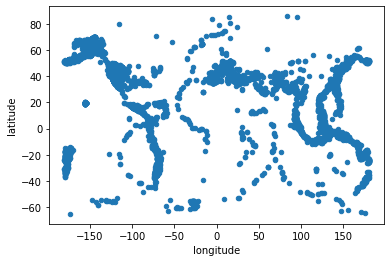

In [5]:
small_df.plot.scatter(x='longitude', y='latitude');

### Using `.hvplot`

As you can see above, the Pandas API gives you a usable plot very easily, where you can start to see the structure of the edges of the plates (which in some cases correspond with the edges of the continents and in others are between two continents). You can make a very similar plot with the same arguments using hvplot. 

In [6]:
import hvplot.pandas

In [7]:
# be careful hovering, my browser has frozen over areas with a high concentration of points
small_df.hvplot.scatter(x='longitude', y='latitude')

:Scatter   [longitude]   (latitude)

Here unlike in the Pandas `.plot()` there is a default hover action on the datapoints to show the location values, and you can also pan and zoom to focus on any particular region of the data of interest.

You might have noticed that many of the dots in the scatter that we've just created lie on top of one another. This is called ["overplotting"](http://datashader.org/user_guide/1_Plotting_Pitfalls.html#1.-Overplotting) and can be avoided in a variety of ways, such as by making the dots slightly transparent, or binning the data. These approaches have the downside of introducing bias because you need to choose the alpha or the edges of the bins, and in order to do that, you have to make assumptions about the data. For an initial exploration of a new dataset, it's much safer if you can just ***see*** the data, before you impose any assumptions about its form or structure. 


#### Exercise

Try changing the alpha (try .1) on the plot above to see the effect of this approach

In [8]:
# be careful hovering, my browser has frozen over areas with a high concentration of points
# this makes it easier to see high concentrations as darker areas
small_df.hvplot.scatter(x='longitude', y='latitude', alpha=0.1)

:Scatter   [longitude]   (latitude)

Try creating a `hexbin` plot.

In [9]:
small_df.hvplot.hexbin(x='longitude', y='latitude')

:HexTiles   [longitude,latitude]

### Datashader

To avoid some of the problems of traditional scatter/point plots we can use [Datashader](datashader.org), which aggregates data into each pixel without any arbitrary parameter settings. In `hvplot` we can activate this capability by setting `datashade=True`.

In [10]:
small_df.hvplot.scatter(x='longitude', y='latitude', datashade=True)

:DynamicMap   []
   :RGB   [longitude,latitude]   (R,G,B,A)

We can already see a lot more detail, but remember that we are still only plotting 1% of the data (21k earthquakes). With datashader, we can easily plot all of the full, original dataset:

In [11]:
import hvplot.dask  # noqa: adds hvplot method to dask objects

In [12]:
df.hvplot.scatter(x='longitude', y='latitude', datashade=True)

:DynamicMap   []
   :RGB   [longitude,latitude]   (R,G,B,A)

Here you can see all of the rich detail in this set of millions of earthquake event locations. If you have a live Python process running, you can zoom in and see additional detail at each zoom level, without tuning any parameters or making any assumptions about the form or structure of the data. We'll come back to Datashader later, but for now the important thing to know about it is that it lets us work with arbitrarily large datasets in a web browser conveniently.

Note that the `.hvplot()` API works here even though `df` is a Dask and not Pandas object, because unlike the other `.plot` libraries, `hvplot` doesn't just target Pandas objects. Instead hvplot can be used with: 
 - Pandas : DataFrame, Series (columnar/tabular data)
 - xarray : Dataset, DataArray (labelled multidimensional arrays)
 - Dask : DataFrame, Series (distributed/out of core arrays and columnar data)
 - Streamz : DataFrame(s), Series(s) (streaming columnar data)
 - Intake : DataSource (data catalogues)
 - GeoPandas : GeoDataFrame (geometry data)
 - NetworkX : Graph (network graphs)

#### Exercise


Select a subset of the data, e.g. only magitudes >5 and plot them with a different colormap (valid `cmap` values include 'viridis', 'Reds' and 'magma'):

In [13]:
# use panel to create a dashboard for this answer
import panel as pn

pn.extension()

In [14]:
mag_slider = pn.widgets.RangeSlider(name='Magnitude', start=0, end=df.mag.max().compute(), value=(5, df.mag.max().compute()))

# create a  dependency
@pn.depends(mag_slider)
def mag_plot(mag):
    lower = df.mag>mag[0] # first item of the tuple stored in range slider (min)
    upper = df.mag<mag[1] # second item of the tuple stored in range slider (max)
    dffilter = lower & upper
    return df[dffilter].hvplot.points(x='longitude', y='latitude', datashade=True, cmap='Reds')

@pn.depends(mag_slider)
def format_title(mag):
    return f'## Earthquake Dashboard: Magnitudes {round(mag[0],2)} to {round(mag[1],2)}'

In [15]:
# format and show the app

# noticing some lag in the title updating, and sometimes it doesn't do it perfectly
# clicking on the slider bar helps this

title = pn.panel(format_title)
fig = pn.Column(format_title, mag_plot)
app = pn.Row(mag_slider, fig)
app

Row
    [0] RangeSlider(end=9.1, name='Magnitude', value=(5, 9.1))
    [1] Column
        [0] ParamFunction(function)
        [1] ParamFunction(function)

<details><summary>Solution</summary><br>

```python
df[df.mag>5].hvplot.scatter(x='longitude', y='latitude', datashade=True, cmap='Reds')
```
    
</details>

### A Note on `points`

As a final note, we should really use `hvplot.points` instead of `hvplot.scatter` in this instance. The former does not exist in the standard pandas `.plot` API which is why we have used `hvplot.scatter` up until now.

The reason scatter is inappropriate is that it implies that the y-axis (latitude) is a *dependent variable* with respect to the x-axis (latitude). In reality, this is not the case, as earthquakes can happen anywhere on the Earth's two-dimensional surface. For this reason, it is best to use `hvplot.points` for earthquake locations, as will be explained further in the next notebook.

In [16]:
df.hvplot.points(x='longitude', y='latitude', datashade=True)

:DynamicMap   []
   :RGB   [longitude,latitude]   (R,G,B,A)

### Statistical Plots

Let's dive into some of the other capabilities of `.plot()` and `.hvplot()`, starting with the frequency of different magnitude earthquakes.

| Magnitude     | Earthquake Effect | Estimated Number Each Year |
|---------------|-------------------|----------------------------|
| 2.5 or less   | Usually not felt, but can be recorded by seismograph. |900,000|
| 2.5 to 5.4    | Often felt, but only causes minor damage. |30,000 |
| 5.5 to 6.0    | Slight damage to buildings and other structures. |500 |
| 6.1 to 6.9    | May cause a lot of damage in very populated areas. | 100 |
| 7.0 to 7.9    | Major earthquake. Serious damage. | 20 |
| 8.0 or greater| Great earthquake. Can totally destroy communities near the epicenter. | One every 5 to 10 years |

As a first pass, we'll use a histogram first with `plot.hist` on the small data, then with `.hvplot.hist` on the full dataset. Before plotting we can clean the data by setting any magnitudes that are less than 0 to NaN.

In [17]:
cleaned_df = df.copy()
cleaned_df['mag'] = df.mag.where(df.mag > 0)
cleaned_small_df = cleaned_df.sample(frac=.01).compute()

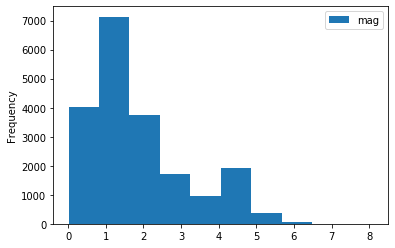

In [18]:
cleaned_small_df.plot.hist(y='mag');

Similarly we can create a histogram of the whole dataset using hvplot, which will leverage Dask to compute the histogram:

In [19]:
df.hvplot.hist(y='mag', bin_range=(0, 10), bins=50)

:Histogram   [mag]   (mag_count)

#### Exercise

Create a kernel density estimate (kde) plot of magnitude using the smaller `cleaned_small_df`:

In [20]:
cleaned_small_df.hvplot.kde(y='mag')

:Distribution   [mag]   (Density)

### Categorical variables

Next we'll categorize the earthquakes based on depth. You can read about all the different variables available in this dataset [here](https://earthquake.usgs.gov/data/comcat/data-eventterms.php). In the interest of time, we'll use the small dataset and assume that it is representative of all the earthquakes. According to the [USGS page on earthquakes depths](https://earthquake.usgs.gov/learn/topics/determining_depth.php):

> Shallow earthquakes are between 0 and 70 km deep; 
intermediate earthquakes, 70 - 300 km deep; and deep earthquakes, 
300 - 700 km deep. 
In general, the term "deep-focus earthquakes" is applied to earthquakes deeper than 70 km. 
All earthquakes deeper than 70 km are localized within great slabs of lithosphere that are sinking into the Earth's mantle.

First we'll use `pd.cut` to split the small_dataset into depth categories.

In [21]:
import numpy as np
import pandas as pd

In [22]:
depth_bins = [-np.inf, 70, 300, np.inf]
depth_names = ['Shallow', 'Intermediate', 'Deep']
depth_class_column = pd.cut(cleaned_small_df['depth'], depth_bins, labels=depth_names)

cleaned_small_df.insert(1, 'depth_class', depth_class_column)

We can now use this new categorical variable to group our data. First we will overlay all our groups on the same plot using the `by` option:

In [23]:
cleaned_small_df.hvplot.hist(y='mag', by='depth_class', alpha=0.6)

:NdOverlay   [depth_class]
   :Histogram   [mag]   (mag_count)

**NOTE:** Click on the legend to turn off certain categories and see what is behind them.

#### Exercise

Add `subplots=True` and `width=300` to see the different classes side-by-side. The y-axis will be linked, so try zooming.

In [24]:
cleaned_small_df.hvplot.hist(y='mag', by='depth_class', subplots=True, width=350)

:NdLayout   [depth_class]
   :Histogram   [mag]   (mag_count)

In [25]:
cleaned_small_df.hvplot.kde(y='mag', by='depth_class')

:NdOverlay   [depth_class]
   :Distribution   [mag]   (Density)

### Grouping
To use a widget to toggle between classes, use the `groupby` option, here in a bivariate plot:

In [26]:
cleaned_small_df.hvplot.bivariate(x='mag', y='depth', groupby='depth_class')

:DynamicMap   [depth_class]
   :Bivariate   [mag,depth]   (Density)

In addition to classifying by depth, we can classify by magnitude.

| Class    | Magnitude | 
|----------|-----------|
| Great    | 8 or more | 
| Major    | 7 - 7.9   | 
| Strong   | 6 - 6.9   |
| Moderate | 5 - 5.9   |
| Light    | 4 - 4.9   |
| Minor    | 3 -3.9    |

In [27]:
classified_df = df[df.mag >= 3]

depth_class = classified_df.depth.map_partitions(pd.cut, depth_bins, labels=depth_names)
classified_df['depth_class'] = depth_class

mag_bins = [2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 10]
mag_names = ['Minor', 'Light', 'Moderate', 'Strong', 'Major', 'Great']
mag_class = classified_df.mag.map_partitions(pd.cut, mag_bins, labels=mag_names)
classified_df['mag_class'] = mag_class

categorical_df = classified_df.groupby(['mag_class', 'depth_class']).count().compute()

Now that be have binned the data into two categories we can use a logarithmic HeatMap to visually represent this data:

In [28]:
categorical_df.hvplot.heatmap(x='mag_class', y='depth_class', C='id',
                              logz=True, clim=(1, np.nan))

:HeatMap   [mag_class,depth_class]   (id)

Here it is clear that the most commonly detected events are light, and typically shallow.

# Exploring further

These visualizations just touch the surface of what is available from hvPlot. To see many more examples, study the [hvPlot website](https://hvplot.pyviz.org). The following section will focus on how to put these plots together once you have them, linking them to understand and show their relationships.